In [2]:
import pandas as pd
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

In [3]:
data=pd.read_csv(r'data_after_cleaning.csv')
data.head()
data.shape

(863, 36)

In [3]:
data.columns

Index(['JobId', 'Source', 'CollectedDate', 'JobTitle', 'CompanyName',
       'RatingNumber', 'PostedDate', 'Posted_Date_N', 'Salary', 'jobURL',
       'fullJobDescribtion', 'Size', 'Type_Of_Ownership', 'Sector', 'Founded',
       'Industry', 'Revenue', 'avg_salary', 'company_text', 'job_state',
       'job_city', 'age_company', 'job_simp', 'seniority', 'desc_len',
       'Machine_Learning', 'Python', 'Spark', 'Excel', 'Aws', 'PyTorch',
       'TensorFlow', 'Tableau', 'Keras', 'Deep_Learning', 'Machine_Deep'],
      dtype='object')


#### So I got a little bit more intersting information, you can see below the box blots are obviously not normalized ,and there are some outliers on length of description

<AxesSubplot:>

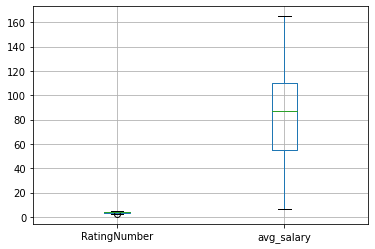

In [4]:
data.boxplot(column =['RatingNumber','avg_salary'])

#### There are some really low ones obviously we've kept that negative one

<AxesSubplot:>

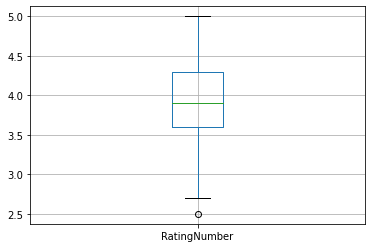

In [5]:
data.boxplot(column =['RatingNumber'])

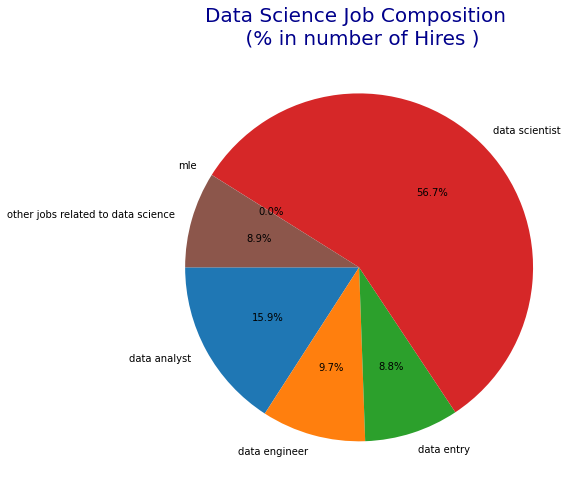

In [6]:
SDA=data[data['job_simp'] == 'data analyst'].reset_index(drop=True)
SDS =data[data['job_simp'] == 'data scientist'].reset_index(drop=True)
SDE = data[data['job_simp'] == 'data engineer'].reset_index(drop=True)
SDM = data[data['job_simp'] == 'mle'].reset_index(drop=True)
SDEn = data[data['job_simp'] == 'data entry'].reset_index(drop=True)
SDO =data[data['job_simp'] == 'other jobs related to data science'].reset_index(drop=True)
frequence_pos=[]
ss=['business analysts','data analytics']
for i in data[~data['job_simp'].isin(ss)]['job_simp'].value_counts():
    frequence_pos.append(i)
SDS['Count']= frequence_pos[0] 
SDA['Count']= frequence_pos[1] 
SDO['Count']= frequence_pos[2] 
SDE['Count']= frequence_pos[3] 
SDEn['Count']= frequence_pos[4]
SDM['Count']= frequence_pos[5] 
All_pos=pd.concat([SDS,SDA,SDO,SDE,SDEn,SDM])
All_pos_data =All_pos.groupby('job_simp')['Count'].sum().reset_index().rename(columns={'job_simp':'Position','Count':'Hires'})
label=All_pos_data['Position'].tolist()
plt.figure(figsize=(8,8))
plt.pie(All_pos_data['Hires'],startangle=180,autopct='%1.1f%%',labels=label)
plt.title('Data Science Job Composition \n (% in number of Hires )',color='darkblue',fontsize=20)
plt.show()

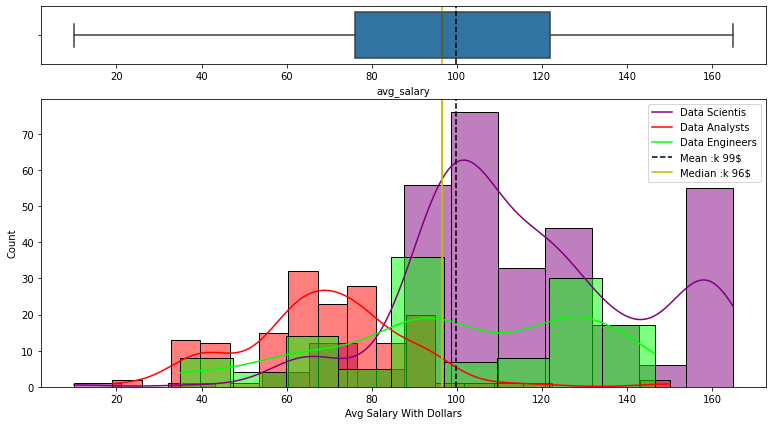

In [7]:
SDS_Salary = SDS['avg_salary']
SDA_Salary = SDA['avg_salary']
SDE_Salary = SDE['avg_salary']
All_DS_DA_DE =pd.concat([SDS,SDA,SDE])
fig ,(ax_box, ax_hist) =plt.subplots(2 , gridspec_kw={'height_ratios':(0.2,1)},figsize=(13,7))
mean   = All_DS_DA_DE['avg_salary'].mean()
median = All_DS_DA_DE['avg_salary'].median()
sns.boxplot(x=All_DS_DA_DE['avg_salary'],ax=ax_box)
ax_box.axvline(mean , color='k' ,linestyle='--')
ax_box.axvline(median , color='y' ,linestyle='-')
sns.histplot(SDS_Salary ,color='purple', ax=ax_hist ,kde=True).set(xlabel='Avg Salary With Dollars')
sns.histplot(SDA_Salary ,color='r',ax=ax_hist,kde=True).set(xlabel ='Avg Salary With Dollars')
sns.histplot(SDE_Salary ,color='lime' ,ax=ax_hist ,kde=True).set(xlabel ='Avg Salary With Dollars')
ax_hist.axvline(mean ,color='k' ,linestyle='--')
ax_hist.axvline(median , color='y' ,linestyle='-')
ax_hist.axvline(median, color='y', linestyle='-')
plt.legend({'Data Scientis':SDS_Salary ,'Data Analysts':SDA_Salary,'Data Engineers':SDE_Salary,'Mean :k '+str(int(mean))+'$':mean , 'Median :k '+str(int(median))+'$':median})
plt.show()

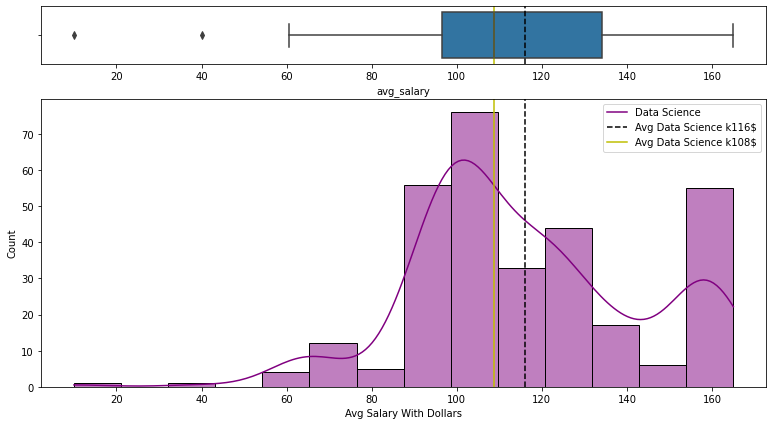

In [8]:
fig ,(ax_box,ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(0.2,1)},figsize=(13,7))
mean   = SDS_Salary.mean()
median = SDS_Salary.median()
sns.boxplot(x=SDS_Salary,ax=ax_box)
ax_box.axvline(mean,color='k',linestyle='--')
ax_box.axvline(median,color ='y',linestyle='-')
sns.histplot(SDS_Salary,color='purple',kde=True).set(xlabel='Avg Salary With Dollars')
ax_hist.axvline(mean,color='k',linestyle='--')
ax_hist.axvline(median , color='y',linestyle='-')
plt.legend({'Data Science':SDS_Salary, 'Avg Data Science k'+str(int(mean))+'$':mean , 'Avg Data Science k'+str(int(median))+'$':median})
plt.show()

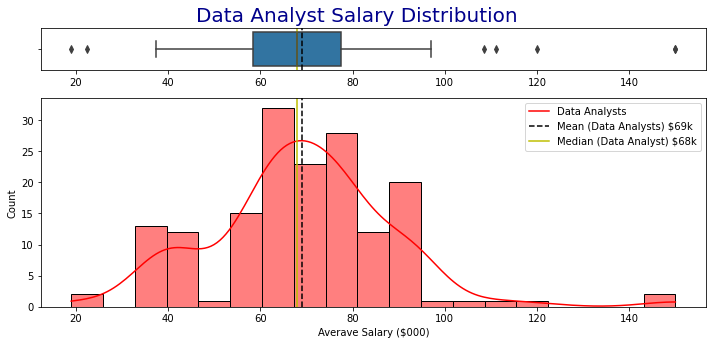

In [9]:
f ,(ax_box,ax_hist)=plt.subplots(2, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,5))
sns.boxplot(x=SDA_Salary, ax=ax_box)
mean=SDA_Salary.mean()
median=SDA_Salary.median()
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')
sns.histplot(x=SDA_Salary ,ax=ax_hist,kde=True,color='red').set(xlabel='Averave Salary ($000)')
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')
plt.legend({'Data Analysts':SDA_Salary,'Mean (Data Analysts) $'+str(int(mean))+'k':mean,'Median (Data Analyst) $'+str(int(median))+'k':median})
ax_box.set(xlabel='')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #Adjust the padding between and around subplots
plt.suptitle('Data Analyst Salary Distribution', fontsize=20,color='darkblue')
plt.show()

#### I got alittle bit more intersting information you can see above the box blots are obviously there are outliers , so we must to drop it by finding the IQR for Salary of Data Analyst ,which data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

In [10]:
percentile25= SDA_Salary.quantile(0.25)
percentile75= SDA_Salary.quantile(0.75)
IQR=percentile75 -percentile25

In [11]:
data['job_state'].value_counts()

 CA               188
Remote            167
 NY                73
 IL                50
 GA                40
 TX                40
 MA                31
 WA                30
 MD                24
 VA                20
 NJ                20
 CT                19
 NC                19
 MO                15
 PA                12
 AL                12
 TN                11
 OR                10
North Carolina      9
Virginia            9
 FL                 8
 DE                 7
Illinois            7
 DC                 5
 MI                 5
 IA                 4
 OH                 4
 UT                 4
 MS                 3
 CO                 3
 NV                 3
 AR                 3
 AZ                 2
 NM                 2
Manhattan           2
 SC                 1
 ME                 1
Name: job_state, dtype: int64

#### Finding upper and lower limit

In [12]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR
print('upper limit =',upper_limit)
print('lower limit =',lower_limit)

upper limit = 106.0
lower limit = 30.0


#### I got a little bit more intersting information as you can see below There is 36 of 291 is outlier

In [13]:
SAD_outlier =SDA[(SDA['avg_salary'] > upper_limit) | (SDA['avg_salary'] < lower_limit)]
SAD_outlier.shape

(7, 37)

In [14]:
SDA = SDA[(SDA['avg_salary'] < upper_limit) & (SDA['avg_salary']> lower_limit)]

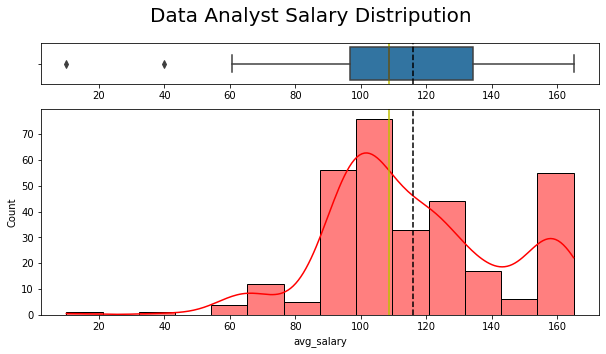

In [15]:
f, (ax_box,ax_hist) =plt.subplots(2,gridspec_kw={'height_ratios':(0.2,1)},figsize=(10,5))
sns.boxplot(x=SDS['avg_salary'],ax=ax_box)
mean=SDS['avg_salary'].mean()
median = SDS['avg_salary'].median()
ax_box.axvline(mean,color='k',linestyle='--')
ax_box.axvline(median, color='y',linestyle='-')
ax_box.set(xlabel='')
sns.histplot(SDS['avg_salary'],ax=ax_hist,kde=True,color='r')
ax_hist.axvline(mean,color='k',linestyle='--')
ax_hist.axvline(median, color='y',linestyle='-')
plt.suptitle('data analyst salary distripution'.title(),fontsize=20)
plt.show()

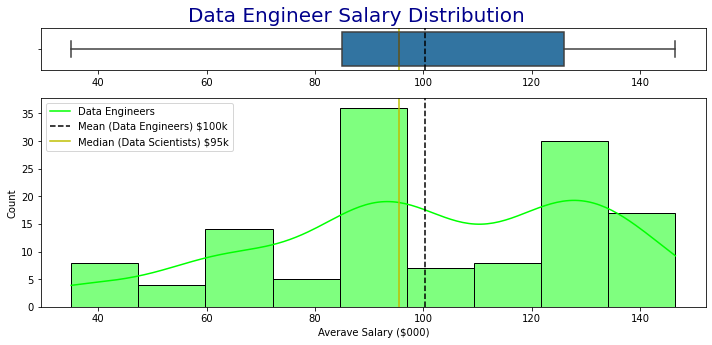

In [16]:
f ,(ax_box,ax_hist)=plt.subplots(2, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,5))
sns.boxplot(x=SDE_Salary, ax=ax_box)
mean=SDE_Salary.mean()
median=SDE_Salary.median()
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')
sns.histplot(x=SDE_Salary ,ax=ax_hist,kde=True,color='lime').set(xlabel='Averave Salary ($000)')
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')
plt.legend({'Data Engineers':SDE_Salary,'Mean (Data Engineers) $'+str(int(mean))+'k':mean,'Median (Data Scientists) $'+str(int(median))+'k':median})
ax_box.set(xlabel='')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #Adjust the padding between and around subplots
plt.suptitle('Data Engineer Salary Distribution', fontsize=20,color='darkblue')
plt.show()

In [17]:
SDS_lowersal_90  =All_pos[(All_pos['avg_salary'] < 90) & (All_pos['job_simp'] =='data scientist')]
SDS_largersal_90 =All_pos[(All_pos['avg_salary'] >= 90 ) & (All_pos['job_simp'] == 'data scientist')]

#### The precense of California as the job location in the high paid group , on the other hand ,the precense of GA in the low paid group. the underpaid group locates more at lower salary such as Manhattan

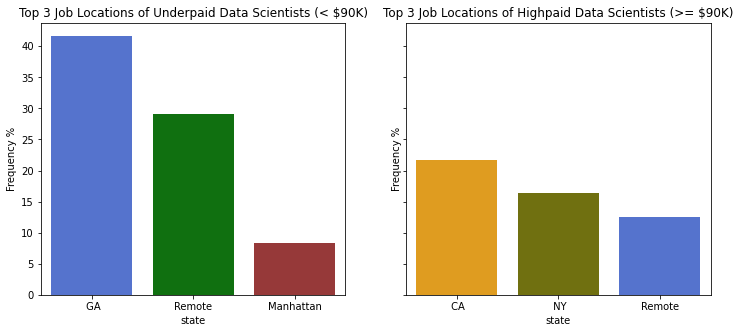

In [18]:
low_ds_salary =SDS_lowersal_90['job_state'].value_counts().reset_index().rename(columns={'index':'state','job_state':'count'})
low_ds_salary['percentage']=(low_ds_salary['count'] / sum(low_ds_salary['count']))*100
low_ds_salary = low_ds_salary.iloc[0:3,:]
high_ds_salary =SDS_largersal_90['job_state'].value_counts().reset_index().rename(columns={'index':'state','job_state':'count'})
high_ds_salary['percentage']=(high_ds_salary['count'] / sum(high_ds_salary['count']))*100
high_ds_salary = high_ds_salary.iloc[0:3,:]
f,ax =plt.subplots(ncols=2,sharey=True,figsize=(12,5))
sns.barplot(x=low_ds_salary['state'] , y=low_ds_salary['percentage'] ,ax=ax[0],palette=['royalblue','green','brown'])
sns.barplot(x=high_ds_salary['state'] , y=high_ds_salary['percentage'],ax=ax[1] , palette=['orange','olive','royalblue'])
ax[0].set(ylabel='Frequency %',title='Top 3 Job Locations of Underpaid Data Scientists (< $90K)')
ax[1].set(ylabel='Frequency %',title='Top 3 Job Locations of Highpaid Data Scientists (>= $90K)')
plt.show()

#### Not suprisingly , a New York-based job is paid more (113K+), but sush a bog gap up to (60K+) a year between New York and other like Massachusetts is still astonishing.Moreover ,regardlessof living cost ,data science professionals

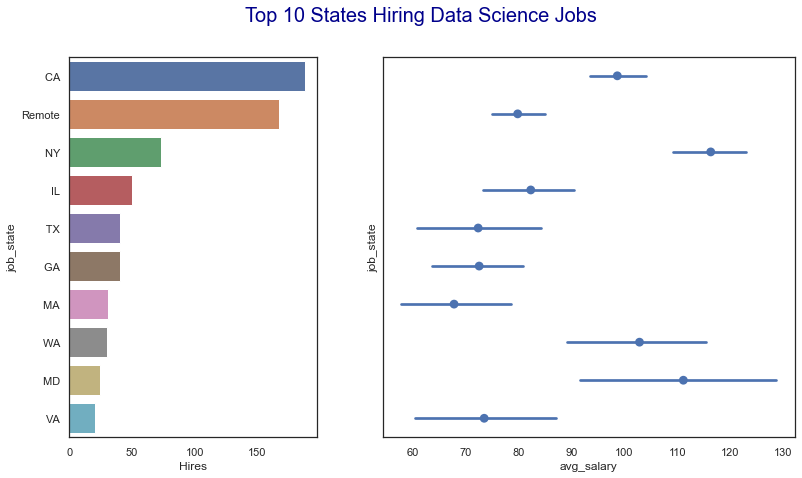

In [19]:
stateCount = data.groupby('job_state')[['job_simp']].count().reset_index().rename(columns={'job_simp':'Hires'}).sort_values('Hires',ascending=False).reset_index(drop=True).head(10)
stateCount = stateCount.merge(data ,on='job_state', how='left')
sns.set(style='white')
fig ,(ax_bar,ax_point) = plt.subplots(ncols=2 , sharey=True,gridspec_kw={'width_ratios':(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='job_state',data=stateCount,ax=ax_bar)
sns.pointplot(x='avg_salary',y='job_state',data=stateCount,ax=ax_point,join=False)
plt.suptitle('Top 10 States Hiring Data Science Jobs',fontsize=20,color='darkblue')
plt.show()

#### Cities such as Annaplolis Junction  have been with the highest salary for data scientist professionals ,because thses cities have mid-high living costs which actually perform much better and might be the real cause to those high salary

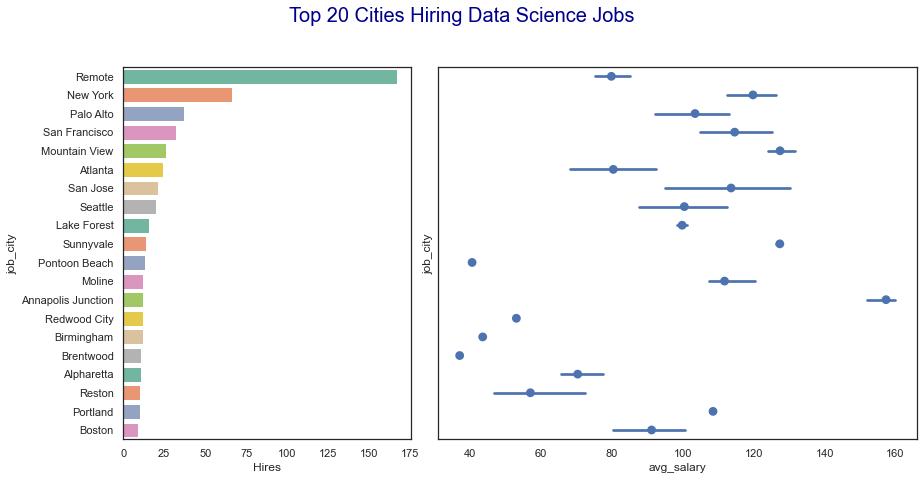

In [20]:
stateCity= data.groupby('job_city')['job_simp'].count().reset_index().rename(columns={'job_simp':'Hires'}).sort_values('Hires',ascending=False).reset_index(drop=True).head(20)
stateCity=stateCity.merge(data,on='job_city',how='left')
sns.set(style="white")
fig,(ax_bar,ax_point) = plt.subplots(ncols=2,sharey=True,gridspec_kw={'width_ratios':(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='job_city',ax=ax_bar,data=stateCity,palette='Set2')
sns.pointplot(x='avg_salary',y='job_city',ax=ax_point,data=stateCity,join=False)
plt.suptitle('Top 20 Cities Hiring Data Science Jobs',fontsize=20,color='darkblue')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#### Let's create a list contain the most comnly most used in the fields of data scientist , data analyst ,data engineer and AI in general

In [21]:
buzzwords = ['COMPUTER_SCIENCE','MASTER','MBA','SQL','PYTHON','R','PHD','BUSINESS_ANALYTICS','SAS','PMP','SCRUM_MASTER','STATISTICS','MATHEMATICS','MACHINE_LEARNING','ARTIFICIAL_INTELLIGENCE','ECONOMICS','TABEAU','AWS','AZURE','POWER_BI','ALGORITHM','DEEP_LEARNING','NEURAL_NETWORK','NATURAL_LANGUAGE_PROCESSING','DECISION_TREE','REGRESSION','CLUSTER','ORACLE','EXCEL','TENSORFLOW','HADOOP','SPARK','NOSQL','SAP','ETL','API','PLSQL','MONGODB','POSTGRESQL','ELASTICSEARCH','REDIS','MYSQL','FIREBASE','SQLITE','CASSANDRA','DYNAMODB','OLTP','OLAP','DEVOPS','PLATFORM','NETWORK','APACHE','SECURITY','MARKDOWN','DASHBOARD','SEABORN','MATPLOTLIB','PANDAS','NUMPY','BACHELORS','KERAS','TENSORFLOW','PYTORCH','MACHINE_LEARNING']

#### We will display the most frequent words in the field of data

In [22]:
datakw = data['fullJobDescribtion'].str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'KW',0:'Count'})
datakw = datakw[datakw['KW'].isin(buzzwords)].reset_index(drop=True)
datakw

,KW,Count


#### as we can see above we have the buzzwords with the capital leters and the Job Descriptions'data is small leter so we are converting job description to capital letter

In [23]:
data['fullJobDescribtion'] = data['fullJobDescribtion'].str.upper()

#### let's print the head of fullJobDescribtion to check out ,as we can see below all fullJobDescribtions are capital letters

In [24]:
data['fullJobDescribtion'].head()

0    POSITION HOME BASED ANYWHERE US CANDIDATES MUS...
1    BILLION PEOPLE PLANET MANY MOVING URBAN CENTER...
2    WORKING ATLASSIAN HIRE PEOPLE COUNTRY LEGAL EN...
3    ALIGNMENT MICROSOFT VALUES COMMITTED CULTIVATI...
4    DEVELOPS VALIDATES EXECUTES ALGORITHMS PREDICT...
Name: fullJobDescribtion, dtype: object

#### let's do  the pervioes code again 

In [25]:
datakw = data['fullJobDescribtion'].str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'KW',0:'Count'})
datakw = datakw[datakw['KW'].isin(buzzwords)].reset_index(drop=True)
datakw

,KW,Count
0,SQL,432
1,PYTHON,430
2,R,318
3,STATISTICS,302
4,PLATFORM,192
5,EXCEL,191
6,MATHEMATICS,168
7,SECURITY,148
8,MASTER,132
9,ECONOMICS,98


#### as we can see above there isn't the most comonly word used in the field of AI such as Machine Learning ,Deep Learning and some think like that ,honeslty there are ML and DL in our fullJobDescribtion but ther is by format " Machine Leraning " whiich there is a blank between them so we are replacing the blank with _ and repeate that for all the most comonly word using in AI

In [26]:
data['fullJobDescribtion'] = data['fullJobDescribtion'].str.upper().replace(
    ['COMPUTER SCIENCE','ENGINEERING DEGREE',' MS ','BUSINESS ANALYTICS','SCRUM MASTER','MACHINE LEARNING',' ML ',
     'POWER BI','ARTIFICIAL INTELLIGENCE',' AI ','ALGORITHMS','DEEP LEARNING','NEURAL NETWORK',
     'NATURAL LANGUAGE PROCESSING','NATURAL LANGUAGE','DECISION TREE','CLUSTERING','PL SQL','MY SQL','DATA MINING','PROBLEM SOLVING','INFORMATION TECHNOLOGY'],
    ['COMPUTER_SCIENCE','ENGINEERING_DEGREE',' MASTER ','BUSINESS_ANALYTICS','SCRUM_MASTER',
     'MACHINE_LEARNING',' MACHINE_LEARNING ','POWER_BI','ARTIFICIAL_INTELLIGENCE',
     ' ARTIFICIAL_INTELLIGENCE ','ALGORITHM','DEEP_LEARNING','NEURAL_NETWORK',
     'NATURAL_LANGUAGE_PROCESSING','NATURAL_LANGUAGE','DECISION_TREE','CLUSTER','PLSQL','MY_SQL','DATA_MINING','PROBLEM_SOLVING','IT'],regex=True)

### Compared between the table above and the table belowe we observe there is MACHINE_LEARNING ,ARTIFICIAL_INTELLIGENCE and COMPUTER_SCIENCE and some think like that

In [27]:
datakw = data['fullJobDescribtion'].str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'KW',0:'Count'})
datakw = datakw[datakw['KW'].isin(buzzwords)].reset_index(drop=True)
datakw

,KW,Count
0,PYTHON,430
1,SQL,428
2,MACHINE_LEARNING,361
3,R,318
4,STATISTICS,302
5,MASTER,214
6,PLATFORM,192
7,EXCEL,191
8,MATHEMATICS,168
9,SECURITY,148


#### We only keep on four categories such as Data Science,Data Engineer,Data Analyst and Data Entry

In [28]:
dskw=data[data['job_simp'] =='data scientist']
dakw=data[data['job_simp'] =='data analyst']
dekw=data[data['job_simp'] =='data engineer']
dentkw=data[data['job_simp'] =='data entry']
dskw = dskw['fullJobDescribtion'].str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'KW',0:'Count'})
dskw=dskw[dskw['KW'].isin(buzzwords)].reset_index(drop=True)
dakw = dakw['fullJobDescribtion'].str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'KW',0:'Count'})
dakw=dakw[dakw['KW'].isin(buzzwords)].reset_index(drop=True)
dekw = dekw['fullJobDescribtion'].str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'KW',0:'Count'})
dekw=dekw[dekw['KW'].isin(buzzwords)].reset_index(drop=True)
dentkw = dentkw['fullJobDescribtion'].str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'KW',0:'Count'})
dentkw=dentkw[dentkw['KW'].isin(buzzwords)].reset_index(drop=True)

#### Machine Learning appears more frequent in the job description for Data Scientists and Data Engineers than Data Analyst,on the other hand Data Scientists are required or prefered to have a much extended breadth of qualifications including PHD degrees wheras other positions focus more on fewer skillest and require and prefer only Master degrees or lower, as well Dashboard appears more frequent in the job description for Data analysts than Data Sciencs and Data engineers beacuse the final output for Data analysts is a Dashboard using Tablue , PowerBi . Platform appears  more frequent  in the job description for Data Engineers and Data Entry than Data Science .

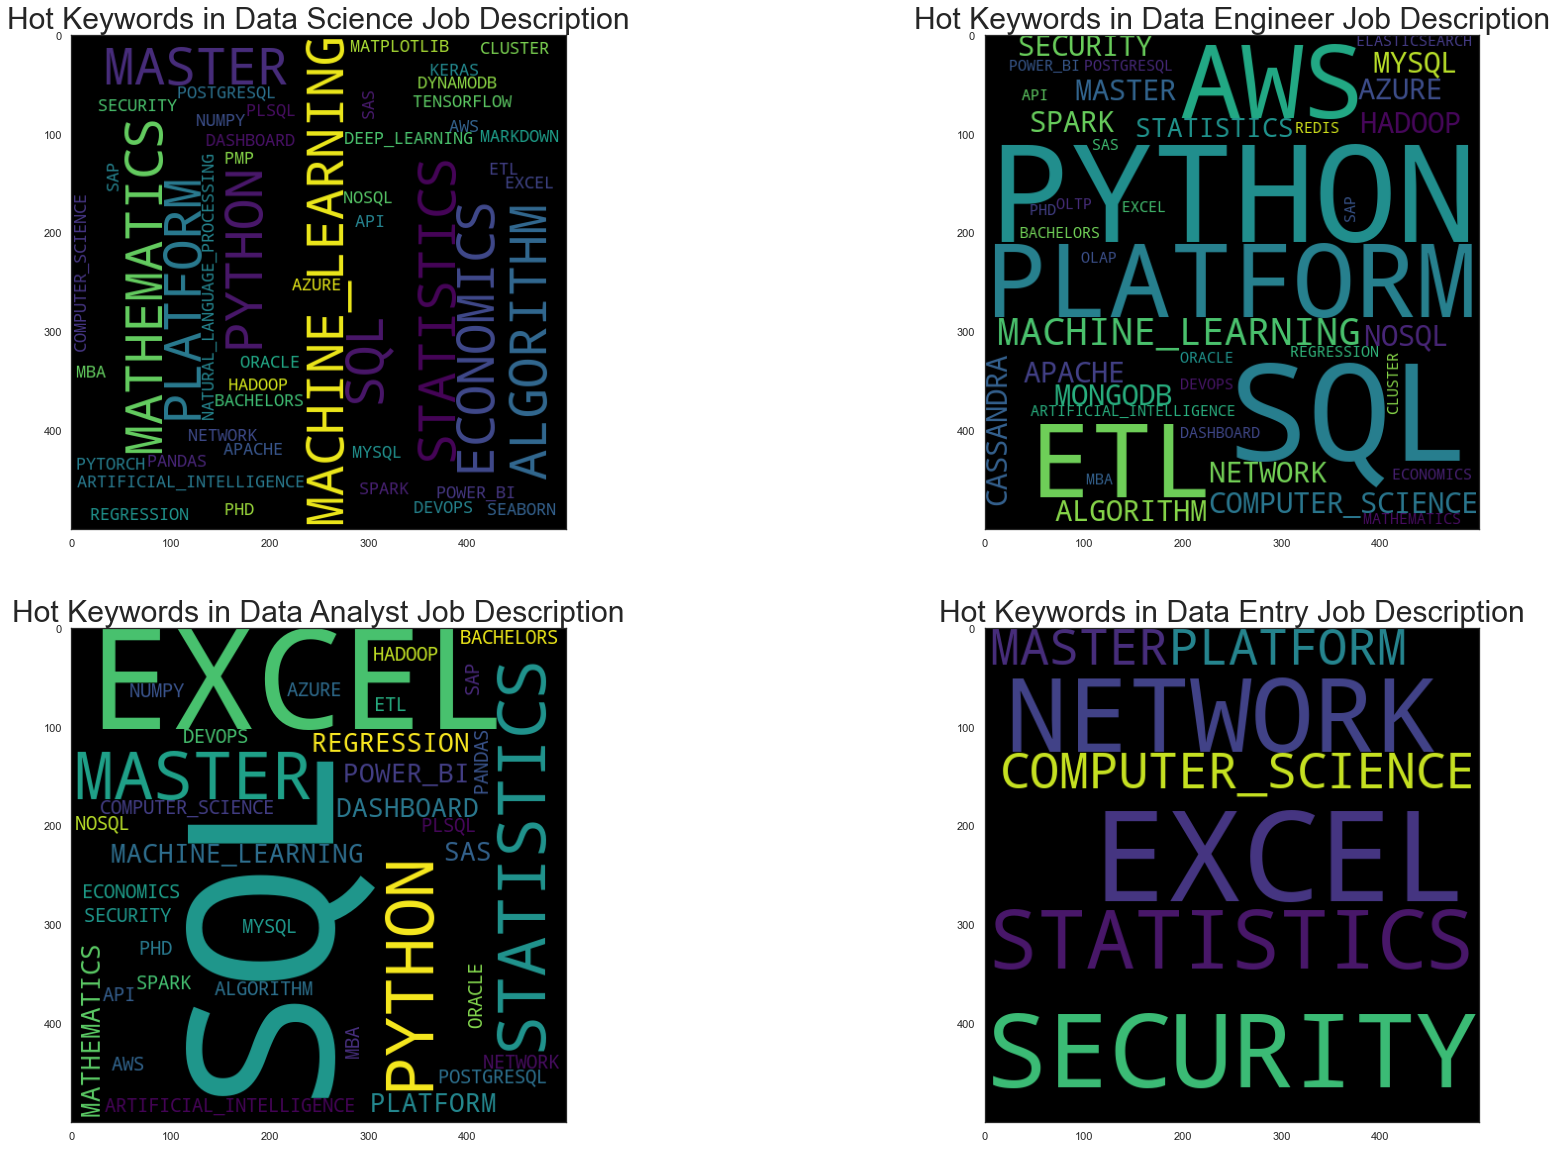

In [29]:
fig ,ax =plt.subplots(ncols=2,nrows=2,gridspec_kw={'width_ratios':(2,2)},figsize=(30,20))
wordcloud1=WordCloud(width=500,height=500).generate(' '.join(dskw['KW']))
ax[0,0].set_title('Hot Keywords in Data Science Job Description',fontsize=30)
wordcloud2=WordCloud(width=500,height=500).generate(' '.join(dekw['KW']))
ax[0,1].set_title('Hot Keywords in Data Engineer Job Description',fontsize=30)
wordcloud3=WordCloud(width=500,height=500).generate(' '.join(dakw['KW']))
ax[1,0].set_title('Hot Keywords in Data Analyst Job Description',fontsize=30)
wordCloud4=WordCloud(width=500,height=500).generate(' '.join(dentkw['KW']))
ax[1,1].set_title('Hot Keywords in Data Entry Job Description',fontsize=30)
ax[0,0].imshow(wordcloud1)
ax[0,1].imshow(wordcloud2)
ax[1,0].imshow(wordcloud3)
ax[1,1].imshow(wordCloud4)
plt.show()

In [30]:
MLS= All_pos.pivot_table(columns='Machine_Deep',index='job_simp',values='avg_salary',aggfunc=[np.mean,'count'])
MLS

mean              count       
Machine_Deep                                 0           1      0      1
job_simp                                                                
data analyst                         70.818493   55.055556  146.0   18.0
data engineer                        99.041667  116.500000  120.0    9.0
data entry                           35.927419   32.500000  124.0    3.0
data scientist                      115.355721  117.362385  201.0  109.0
mle                                        NaN  128.833333    NaN    3.0
other jobs related to data science   60.804545   70.142857  110.0    7.0

#### Machine and Deep Learning are Hot in Data Engineer and Data SCience but Cold in both of Data Analyst and Data Entry
Some keywords on job titles also have an impact on the salaries ,the most obvious one is "Machine and Learning".data shows "Machine are Data Learning " written on job title would increase this job's salaty by more than 20% on Data engineer and 5 % on Data science .However the phrases "Artificial Intelligence" doesn't have comparable significant effects and "Machine Learing" shows up on analyst salaries

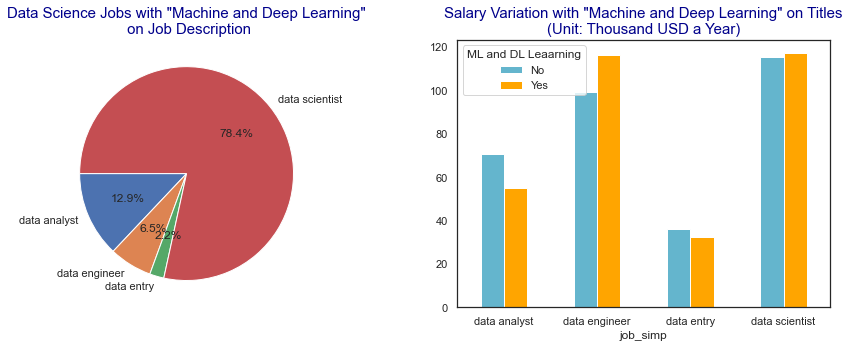

In [31]:
MLS = MLS.iloc[0:4,:]
MLDSDEDADENT = MLS.iloc[:,0:2]
fig ,ax=plt.subplots(ncols=2,gridspec_kw={'width_ratios':(1,0.7)},figsize=(13,5))
ax[0].pie(MLS.iloc[:,3],startangle=180, autopct='%1.1f%%',labels=MLS.index.tolist())
ax[0].set_title('Data Science Jobs with "Machine and Deep Learning"\n on Job Description',color='darkblue',fontsize=15)
MLDSDEDADENT.plot(ax=ax[1],kind='bar',color=['c','orange']).legend(title='ML and DL Leaarning',labels=['No','Yes'],loc='upper left')
ax[1].set_title('Salary Variation with "Machine and Deep Learning" on Titles\n(Unit: Thousand USD a Year)',color='darkblue',fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Next thing generaly we want to do the correlation between our continues variable ,you can see the actual correlation between each of these,So RatingNumber has a very small negative correlation with age_company ,on the other hand,the RatingNumber has the positive correltion with avg_salary .age_company has positive correlation with length of description which I mean older companies have a looks like  longer description lengths, as well as age_company hasn't any correlation with avg_salry so we drop it from out data 

In [33]:
data.columns

Index(['JobId', 'Source', 'CollectedDate', 'JobTitle', 'CompanyName',
       'RatingNumber', 'PostedDate', 'Posted_Date_N', 'Salary', 'jobURL',
       'fullJobDescribtion', 'Size', 'Type_Of_Ownership', 'Sector', 'Founded',
       'Industry', 'Revenue', 'avg_salary', 'company_text', 'job_state',
       'job_city', 'age_company', 'job_simp', 'seniority', 'desc_len',
       'Machine_Learning', 'Python', 'Spark', 'Excel', 'Aws', 'PyTorch',
       'TensorFlow', 'Tableau', 'Keras', 'Deep_Learning', 'Machine_Deep'],
      dtype='object')

In [33]:
data[['age_company','avg_salary','desc_len','RatingNumber']].corr()

,age_company,avg_salary,desc_len,RatingNumber
age_company,1.000000,0.012277,0.171568,-0.072466
avg_salary,0.012277,1.000000,0.390186,0.268853
desc_len,0.171568,0.390186,1.000000,-0.073761
RatingNumber,-0.072466,0.268853,-0.073761,1.000000


#### but we want to make slightly visually more appealing ,as we can see below the strongest correlation between length of description and avg_salary ,so thoso are positive correlated  

<AxesSubplot:>

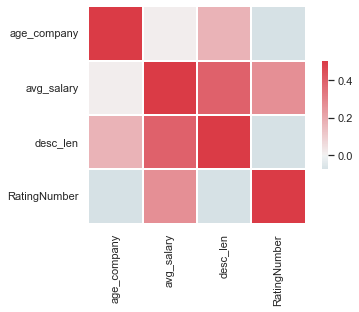

In [34]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[['age_company','avg_salary','desc_len','RatingNumber']].corr(),vmax=.5, center=0, cmap=cmap,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})

In [35]:
data.columns

Index(['JobId', 'Source', 'CollectedDate', 'JobTitle', 'CompanyName',
       'RatingNumber', 'PostedDate', 'Posted_Date_N', 'Salary', 'jobURL',
       'fullJobDescribtion', 'Size', 'Type_Of_Ownership', 'Sector', 'Founded',
       'Industry', 'Revenue', 'avg_salary', 'company_text', 'job_state',
       'job_city', 'age_company', 'job_simp', 'seniority', 'desc_len',
       'Machine_Learning', 'Python', 'Spark', 'Excel', 'Aws', 'PyTorch',
       'TensorFlow', 'Tableau', 'Keras', 'Deep_Learning', 'Machine_Deep'],
      dtype='object')

In [51]:
df_cat=data[['Size','Type_Of_Ownership','Sector','Revenue','job_simp','seniority','Machine_Learning','Python','Spark','Excel','Aws','PyTorch','TensorFlow', 'Tableau', 'Keras', 'Deep_Learning', 'Machine_Deep']]

In [52]:
df_cat.columns

Index(['Size', 'Type_Of_Ownership', 'Sector', 'Revenue', 'job_simp',
       'seniority', 'Machine_Learning', 'Python', 'Spark', 'Excel', 'Aws',
       'PyTorch', 'TensorFlow', 'Tableau', 'Keras', 'Deep_Learning',
       'Machine_Deep'],
      dtype='object')

the gragh for Size total is 8


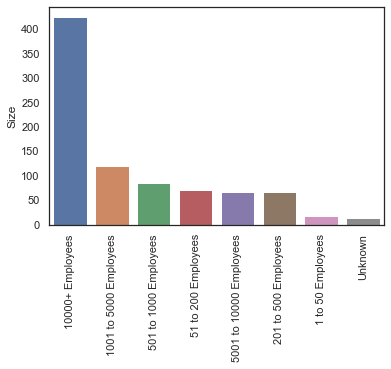

the gragh for Type_Of_Ownership total is 9


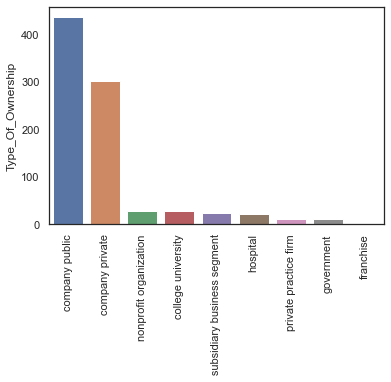

the gragh for Sector total is 20


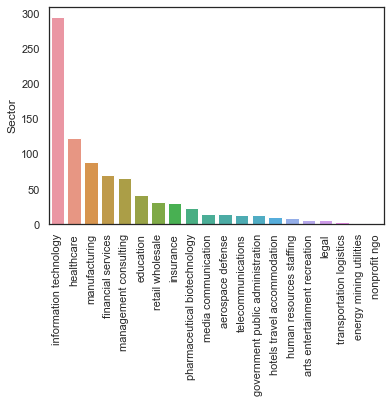

the gragh for Revenue total is 10


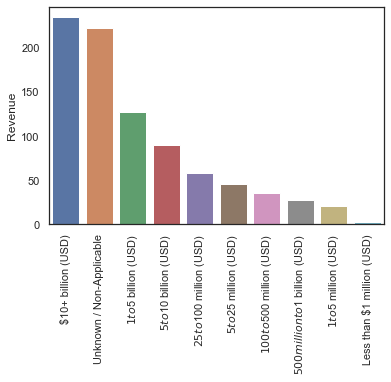

the gragh for job_simp total is 9


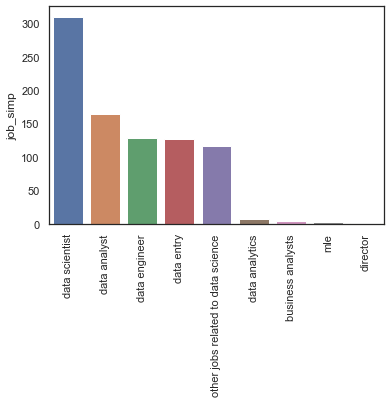

the gragh for seniority total is 4


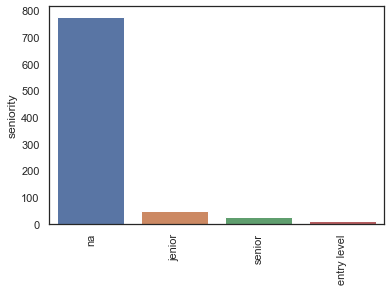

the gragh for Machine_Learning total is 2


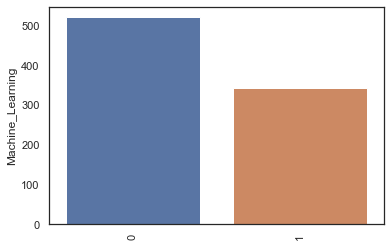

the gragh for Python total is 2


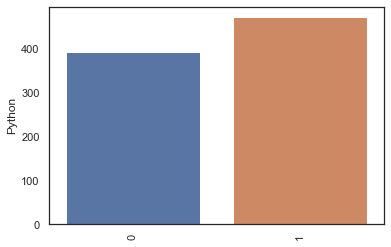

the gragh for Spark total is 2


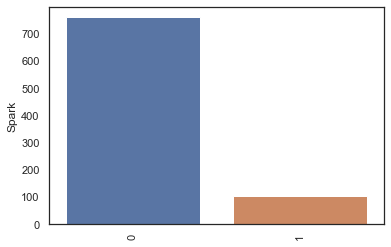

the gragh for Excel total is 2


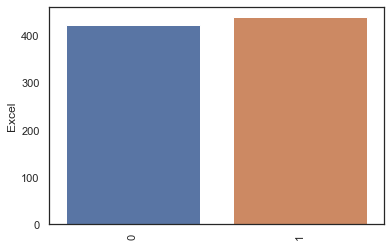

the gragh for Aws total is 2


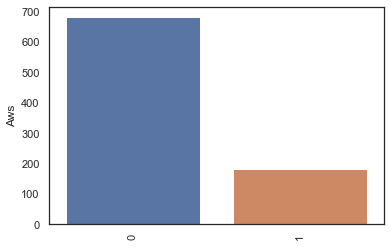

the gragh for PyTorch total is 2


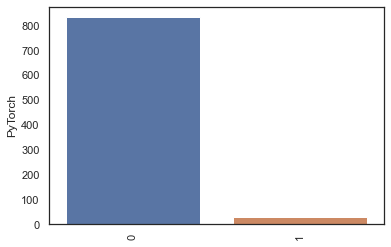

the gragh for TensorFlow total is 2


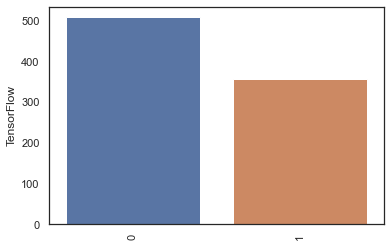

the gragh for Tableau total is 2


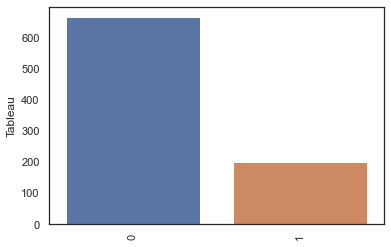

the gragh for Keras total is 2


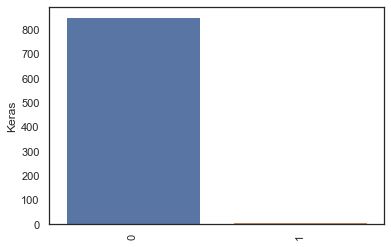

the gragh for Deep_Learning total is 2


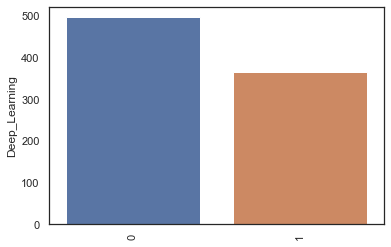

the gragh for Machine_Deep total is 2


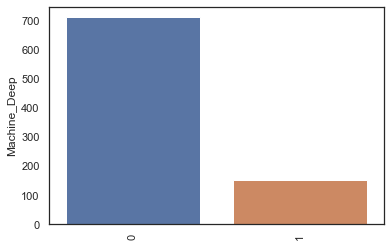

In [53]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()[:20]
    print('the gragh for %s total is %d'%(i,len(cat_num)))
    charts =sns.barplot(x=cat_num.index,y=cat_num)
    charts.set_xticklabels(charts.get_xticklabels(),rotation=90)
    plt.show()
          